# 3-6. 프로젝트: 고양이 수염 스티커 만들기

---

## Step 1. 스티커 구하기 or 만들기

[고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)에서 다운로드 하기

셀카 사진 업로드

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math

# 필요한 모듈 불러오기

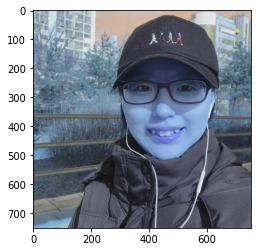

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/test.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

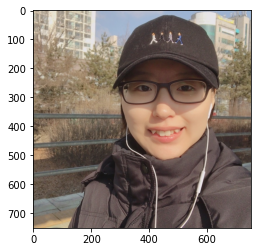

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)

rectangles[[(277, 206) (598, 527)]]


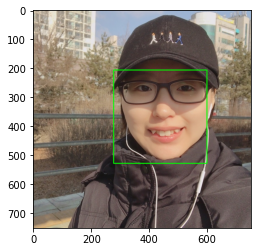

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 모델을 불러오기

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


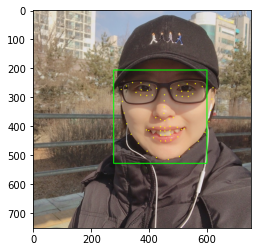

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 68개의 이목구비 위치를 노란색으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(450, 355)
(x,y) : (450,194)
(w,h) : (322,322)


(322, 322, 3)


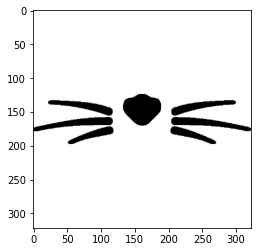

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

# 스티커 불러오기/리사이즈

In [12]:
refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (289,194)


## Step 4. 스티커 적용하기

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

print (sticker_area.shape)
# 원본 이미지에 스티커를 적용

(322, 322, 3)


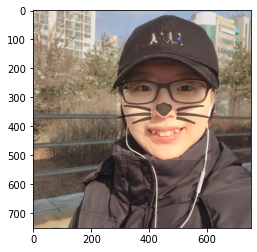

In [14]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.7, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.addWeighted() 스티커를 조금 더 자연스럽게 적용하기

## Step 5. 문제점 찾아보기

## 5.1 얼굴 각도에 따른 문제점

### 5.1.1 비스듬한 각도의 사진 불러오기

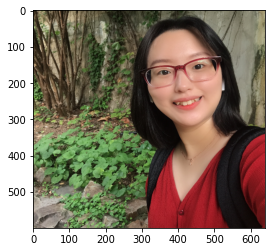

In [15]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mypicture.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

### 5.1.2 얼굴 검출 및 랜드마크 표시

rectangles[[(315, 93) (538, 316)]]
68


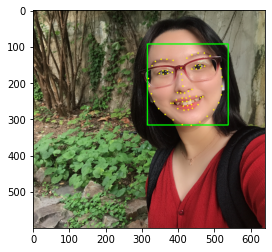

In [16]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 5.1.3 스티커 적용 위치 확인

(413, 209)
(x,y) : (413,97)
(w,h) : (224,224)
(224, 224, 3)
(x,y) : (301,97)


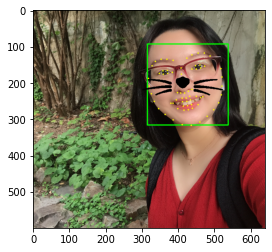

In [17]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

# 스티커 불러오기/리사이즈

refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


### 5.1.3 스티커 적용 하기

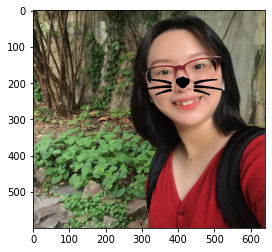

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#  참고사항: 확실한 대비를 위해 cv2.addWeighted()는 적용하지 않았다.

### 5.1.4 문제점
   - 고개가 기울어진 사진에도 정상적으로 고양이 수염이 붙으나 각도가 맞지 않는 것을 볼 수 있다.

###  5.1.5 해결방안
   - 랜드마크의 회전 각을 구하여 고양이 수염 스티커에 적용하여 회전된 수염스티커를 붙인다.

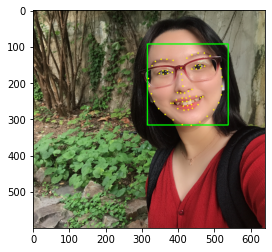

In [19]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mypicture.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기


detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
x = []
y = []
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x.append(landmark[30][0])    # x = landmark[30][0]
    y.append(landmark[30][1] - dlib_rect.width()//2)  # y =land~~
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(w,h) : (%d,%d)'%(w,h))

(w,h) : (224,224)


In [21]:
# 회전 각 구하기

tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

5.710593137499643


(224, 224, 3)


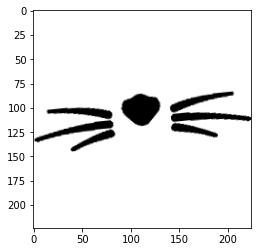

In [22]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

In [23]:
refined_x = []
refined_y = []
for i in range(len(x)):
    refined_x.append(x[i] - w//2)  # left
    refined_y.append(y[i])     # top

In [24]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]]
    img_show[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]] = np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)

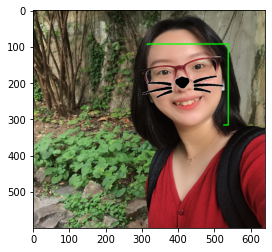

In [25]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

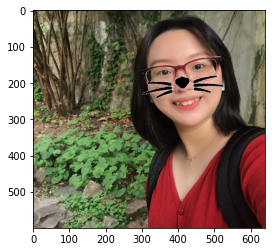

In [26]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]]
    img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]] = np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

###  5.1.6 결과
   - 위 코드를 통해 얼굴 각도에 맞게 회전된 스티커를 붙였다.

---

## 5.2 사진 회전에 따른 문제점

###  5.2.1 회전된 사진 스티커 적용 가능 여부 확인

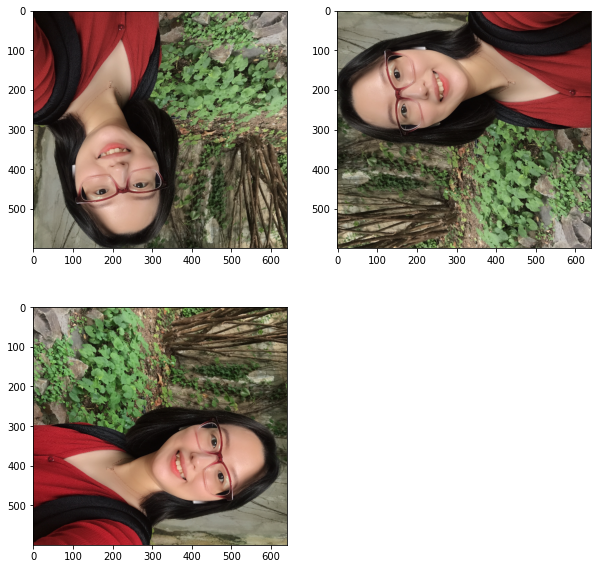

In [27]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/mypicture01.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기

my_image_path1 = os.getenv('HOME')+'/aiffel/camera_sticker/images/mypicture02.jpeg'
img_bgr1 = cv2.imread(my_image_path1)    #- OpenCV로 이미지를 읽기
img_bgr1 = cv2.resize(img_bgr1, (640, 600))  # 640x600의 크기로 Resize
img_show1 = img_bgr1.copy()      #- 출력용 이미지 별도 보관
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기


my_image_path1 = os.getenv('HOME')+'/aiffel/camera_sticker/images/mypicture03.jpeg'
img_bgr2 = cv2.imread(my_image_path1)    #- OpenCV로 이미지를 읽기
img_bgr2 = cv2.resize(img_bgr2, (640, 600))  # 640x600의 크기로 Resize
img_show2 = img_bgr1.copy()      #- 출력용 이미지 별도 보관
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기


plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img_rgb)
plt.subplot(222)
plt.imshow(img_rgb1)
plt.subplot(223)
plt.imshow(img_rgb2)
plt.show()

In [30]:
# mypicture01.jpeg의 랜드마크 확인시 에러 발생됨을 알 수 있다.

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


IndexError: list index out of range

In [31]:
# mypicture02.jpeg의 랜드마크 확인시 에러 발생됨을 알 수 있다.

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb1, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


IndexError: list index out of range

In [33]:
# mypicture03.jpeg의 랜드마크 확인시 에러 발생됨을 알 수 있다.

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb2, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


IndexError: list index out of range

### 5.2.2 결론

- 얼굴 각도가 틀어진 사진이 아닌 회전된 사진에 대해서는 랜드마크 적용이 되지 않았다.
- 랜드마크 인식이 되지 않으면 스티커 회전각 또한 구할 수 없기에 위 이미지에 스티커를 적용할 수 없었다.
- 위 사항을 해결하기 위해서는 다양한 방향을 인식할 수 있는 랜드마크 모델 사용 또는 모델 수정이 필요하다.

---

## 5.3 사진 밝기에 따른 문제점

### 5.3.1 이미지밝기

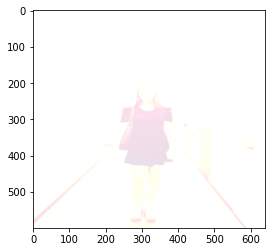

In [34]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/brightness.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize

val = 222
array = np.full(img_bgr.shape, (val, val, val), dtype=np.uint8)
img_bgr = cv2.add(img_bgr, array) # 이미지 밝기 조정 -> 밝게


img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기

plt.imshow(img_rgb)
plt.show()

In [35]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


IndexError: list index out of range

### 5.3.2 인식이 안되는 경우
- 너무 밝아 얼굴이 인식되지 않을 경우, 랜드마크와 스티커 적용이 불가하다.

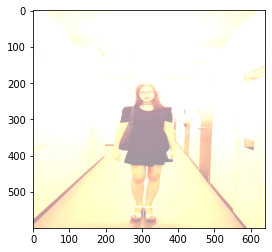

In [36]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/brightness.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize

val = 150
array = np.full(img_bgr.shape, (val, val, val), dtype=np.uint8)
img_bgr = cv2.add(img_bgr, array) # 이미지 밝기 조정 -> 밝게


img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기

plt.imshow(img_rgb)
plt.show()

rectangles[[(290, 214) (333, 257)]]
68


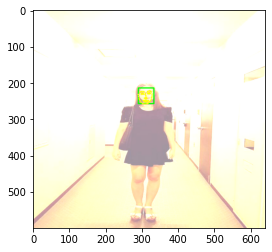

In [37]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(311, 240)
(x,y) : (311,218)
(w,h) : (44,44)
(44, 44, 3)
(x,y) : (289,218)


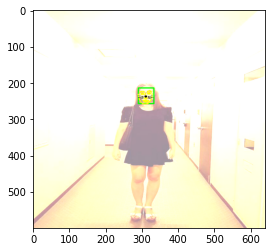

In [38]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

# 스티커 불러오기/리사이즈

refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


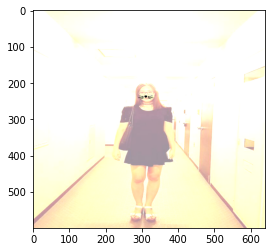

In [39]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 5.3.3 결론

- 이미지 밝기를 조정함으로써 랜드마크 인식에 영향을 끼칠 수 있다. (어둡게 하는 경우도 비슷한 결과를 얻을 수 있다.)
- 랜드마크 인식이 되는 한도 내의 밝기 조정은 스티커를 붙이는 데 지장을 주지 않는다.
- 다만 정확한 인식을 방해할 수 있어 밝기 또한 적절한 사진을 선택하는 것이 좋다.

---

## 5.4 얼굴 가려짐에 따른 문제점

### 5.4.1 얼굴 일부 가려짐

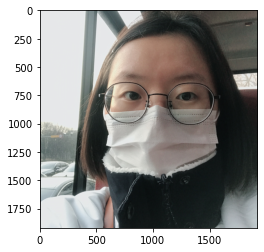

In [40]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/occluded.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기

plt.imshow(img_rgb)
plt.show()

In [41]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


IndexError: list index out of range

###  5.4.2 결론

- 얼굴이 가려진 경우도 각도, 이미지 밝기와 마찬가지로 랜드마크 인식이 불가하다.
- 최근 기술로는 마스크를 쓰더라도 사람을 인식할 수 있다. 어떤 방식으로 가능한 건지 궁금하다.

---

## 5.5 인원수에 따른 문제점

### 5.5.1 여러명 인식하기

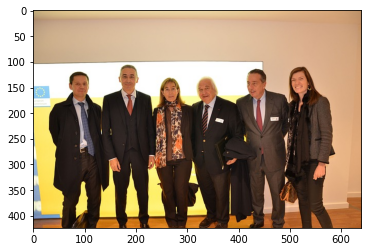

In [42]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/pixabay.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기

plt.imshow(img_rgb)
plt.show()

rectangles[[(409, 130) (445, 166)], [(497, 122) (533, 158)], [(165, 118) (201, 154)], [(73, 130) (109, 166)], [(313, 142) (349, 178)], [(249, 146) (285, 182)]]
68


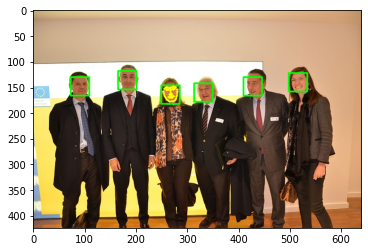

In [43]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(420, 151)
(x,y) : (420,133)
(w,h) : (37,37)
(512, 143)
(x,y) : (512,125)
(w,h) : (37,37)
(185, 139)
(x,y) : (185,121)
(w,h) : (37,37)
(96, 150)
(x,y) : (96,132)
(w,h) : (37,37)
(331, 162)
(x,y) : (331,144)
(w,h) : (37,37)
(268, 162)
(x,y) : (268,144)
(w,h) : (37,37)
(37, 37, 3)
(x,y) : (250,144)


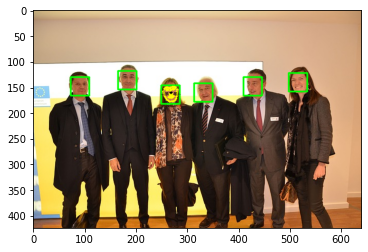

In [44]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

# 스티커 불러오기/리사이즈

refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


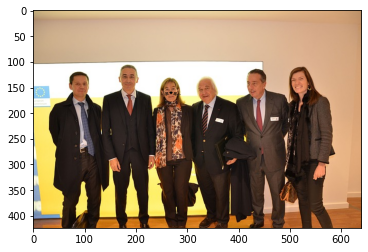

In [45]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 5.5.2 결론

- 전원 얼굴이 인식되었지만 한명에게만 스티커 적용된 것을 확인했다.
- 모두에게 랜드마크와 스티커가 적용될 수 있도록 반복이 필요하다.
- 제출기한이 있어 이 부분에 대한 코드 재작성이 되지 않은 점이 아쉽다.

---

## 루브릭 관련 고려한 점

**1. 자기만의 카메라앱 기능 구현을 완수하였다.**

- 원본 사진에 cv2.addWeighted()를 이용하여 투명도를 조정한 고양이 수염 스티커가 정상적으로 합성되었다.

**2. 스티커 이미지를 정확한 원본 위치에 반영하였다.**

- 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
- 3번 문제점 찾아보기에서 적용 불가한 케이스들을 제외하고 의도한 위치에 스티커를 놓았다.

**3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.**

- 각도와 밝기, 가려짐 등 스티커를 붙이는 데 영향을 끼칠 수 있는 요인에 대해 고민하였다.
- 랜드마크가 정확하게 인식이 된다면 스티커를 붙이는 부분에 있어서 큰 오류는 발생되지 않는 것 같다.

## 회고

- 단순히 정면사진에 수염을 붙이는 과정은 단순하였지만 각도, 스티커 방향, 밝기 등 변수들을 고려하는 점을 학습하는데 시간이 걸렸다.
- 실제로 사용하고 있는 스티커 앱들을 보면 여러 기능을 함께 제공하고 있는데, 현재 기술뿐만 아니라 미래 기술을 위해 더 공부해야겠다고 다짐했다.


- 되도록 스스로 찍은 사진을 사용하도록 노력했는데 적절한 단체사진이 보이지 않아 저작권 없는 무료 이미지 사이트 [pixabay](https://pixabay.com/photos/people-commision-europeean-1157854/)에서 다운로드하였다.
- No attribution required 저작자 표기가 필요없는 사진임을 확인했으나 재사용 또는 문제 발생이 될 점을 고려해 남겨놓는다.(pixabay 링크 참조)


- 사진 선택 시 랜드마크 인식되는 범위 내에서 선택하는 것이 스티커를 잘 적용하는 방법이라고 생각한다.
- 그렇지만 방해 요인이 있더라도 정확한 얼굴인식이 가능한 방향성에 대한 해결책을 생각하는 것도 필요하다.
- 지금 해내지 못한 문제점들에 대해서 다시 보완할 시간을 가져보고 싶다.


- 어려웠던 점: 
    1. np.where()이나 cv2 등 모듈과 문법을 처음 접해서 의도한 것과 다르게 적용되는 시행착오가 많았다.
    2. 그 이후 어려웠던 점은 위치에 대한 이해같다. sticker_area 전후 코드를 여러번 읽어 보았다.
    3. 여러명 인식하고 스티커 적용하기 위해서는 더 필요한 것들이 무엇인지 갈피가 잡히지 않는다. 동료들에게 조언을 구할 것이다.



- 배운 점: 
    1. opencv는 BGR로 쓰이기에 RGB로 변환해주어야 한다는 점
    2. 실패, 적용되지 않는 이미지 등을 해결하는 것도 중요하지만, 모델도 테스트 셋을 통해 검증해나가듯이 실패를 통해 성장하는 것을 느꼈다. 
    3. 더불어 입력한 내용의 결과값에 대해 생각해볼 수 있는 시간이였다.
    4. 수염 각도 뿐만 아니라 변환하여 입체감을 살리게 하는 방법에 대해서 올린 글을 읽었다. 해당 글에 대해서도 자세히 읽고 적용한다면 좋을 것 같다.